# Supervised Learning Algorithms

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear Regression

**Linear Regression** is one of the simplest and most widely used supervised machine learning algorithms. It is used for predicting a continuous target variable (also called the dependent variable) based on one or more input features (independent variables). The relationship between the input features and the target variable is assumed to be **linear**.

---

### Key Concepts of Linear Regression:
1. **Equation of a Line**:
   - In simple linear regression (with one feature), the relationship is represented by the equation:
     $
     y = mx + b
     $
     - $ y $: Target variable (output).
     - $ x $: Feature (input).
     - $ m $: Slope (weight of the feature).
     - $ b $: Intercept (bias term).

   - In multiple linear regression (with multiple features), the equation becomes:
     $
     y = b_0 + b_1x_1 + b_2x_2 + \dots + b_nx_n
     $
     - $ b_0 $: Intercept.
     - $ b_1, b_2, \dots, b_n $: Coefficients (weights) for each feature.
     - $ x_1, x_2, \dots, x_n $: Input features.

2. **Objective**:
   - The goal of linear regression is to find the best-fitting line (or hyperplane in higher dimensions) that minimizes the difference between the predicted values and the actual values.

3. **Cost Function**:
   - The most common cost function used in linear regression is the **Mean Squared Error (MSE)**:
     $
     \text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
     $
     - $ y_i $: Actual value.
     - $ \hat{y}_i $: Predicted value.
     - $ N $: Number of data points.

4. **Optimization**:
   - The coefficients ($ b_0, b_1, \dots, b_n $) are optimized using techniques like:
     - **Ordinary Least Squares (OLS)**: A closed-form solution that minimizes the MSE.
     - **Gradient Descent**: An iterative optimization algorithm used for large datasets or complex models.

---

### Assumptions of Linear Regression:
1. **Linearity**: The relationship between the features and the target variable is linear.
2. **Independence**: Observations are independent of each other (no autocorrelation).
3. **Homoscedasticity**: The residuals (errors) have constant variance across all levels of the independent variables.
4. **Normality**: The residuals are normally distributed (important for confidence intervals and hypothesis testing).
5. **No Multicollinearity**: The independent variables are not highly correlated with each other.

---

### Types of Linear Regression:
1. **Simple Linear Regression**:
   - Only one input feature is used to predict the target variable.
   - Example: Predicting house prices based on square footage.

2. **Multiple Linear Regression**:
   - Multiple input features are used to predict the target variable.
   - Example: Predicting house prices based on square footage, number of bedrooms, and location.

3. **Polynomial Regression**:
   - A form of linear regression where the relationship between the independent variable and the dependent variable is modeled as an $ n $-degree polynomial.
   - Example: $ y = b_0 + b_1x + b_2x^2 + \dots + b_nx^n $.

---

### Advantages of Linear Regression:
- Simple to understand and interpret.
- Computationally efficient.
- Works well when the relationship between variables is linear.

---

### Disadvantages of Linear Regression:
- Assumes a linear relationship, which may not hold in real-world scenarios.
- Sensitive to outliers.
- Cannot handle complex relationships between variables.


In [11]:
url = 'lr.csv'
data = pd.read_csv(url)
# data

# Drop the missing values
data = data.dropna()

# training dataset and labels
inputData = np.array(data.x[0:500]).reshape(500, 1)
outputData = np.array(data.y[0:500]).reshape(500, 1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)


Iteration = 1, Loss = 7062.869036311694
Iteration = 1, Loss = 858.03519668536
Iteration = 1, Loss = 110.28519344676734
Iteration = 1, Loss = 20.17318010352183
Iteration = 2, Loss = 9.313701396080308
Iteration = 3, Loss = 8.005015591014354
Iteration = 4, Loss = 7.847304268800499
Iteration = 5, Loss = 7.828297897483453
Iteration = 6, Loss = 7.82600698227326
Iteration = 7, Loss = 7.825730461477029
Iteration = 8, Loss = 7.825696697174045
Iteration = 9, Loss = 7.825692187714718
Iteration = 10, Loss = 7.8256912038268
Iteration = 11, Loss = 7.825690644852978
Iteration = 12, Loss = 7.8256901371302945
Iteration = 13, Loss = 7.825689635628298
Iteration = 14, Loss = 7.8256891349203235
Iteration = 15, Loss = 7.825688634352387
Iteration = 16, Loss = 7.825688133845682
Iteration = 17, Loss = 7.8256876333907
Iteration = 18, Loss = 7.825687132986294
Iteration = 19, Loss = 7.825686632632321
Iteration = 20, Loss = 7.825686132328758


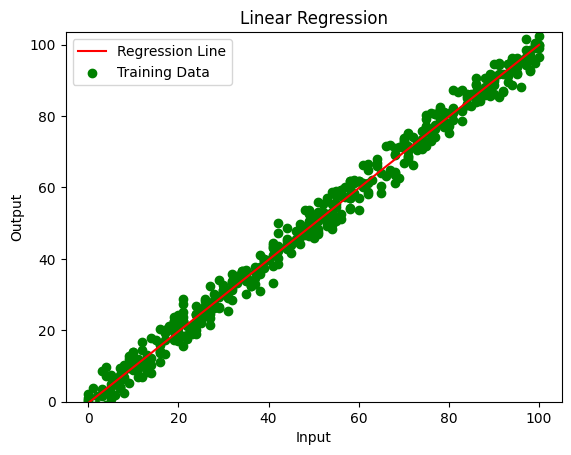

In [14]:
from matplotlib.animation import FuncAnimation


class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forwardPropagation(self, inputData): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, inputData) + c 
        return predictions 

    def costFunction(self, predictions, outputData): 
        cost = np.mean((outputData - predictions) ** 2) 
        return cost 

    def backwardPropagation(self, inputData, outputData, predictions): 
        derivatives = {} 
        df = (predictions-outputData) 
        # dm= 2/n * mean of (predictions-actual) * input 
        dm = 2 * np.mean(np.multiply(inputData, df)) 
        # dc = 2/n * mean of (predictions-actual) 
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def updateParameters(self, derivatives, learningRate): 
        self.parameters['m'] = self.parameters['m'] - learningRate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learningRate * derivatives['dc'] 

    def train(self, inputData, outputData, learningRate, iters): 
        # Initialize random parameters 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss 
        self.loss = [] 

        # Initialize figure and axis for animation 
        fig, ax = plt.subplots() 
        xValues = np.linspace(min(inputData), max(inputData), 100) 
        line, = ax.plot(xValues, self.parameters['m'] * xValues +
                        self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(inputData, outputData, marker='o', 
                color='green', label='Training Data') 

        # Set y-axis limits to exclude negative values 
        ax.set_ylim(0, max(outputData) + 1) 

        def update(frame): 
            # Forward propagation 
            predictions = self.forwardPropagation(inputData) 

            # Cost function 
            cost = self.costFunction(predictions, outputData) 

            # Back propagation 
            derivatives = self.backwardPropagation( 
                inputData, outputData, predictions) 

            # Update parameters 
            self.updateParameters(derivatives, learningRate) 

            # Update the regression line 
            line.set_ydata(self.parameters['m'] 
                        * xValues + self.parameters['c']) 

            # Append loss and print 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 

            return line, 
        # Create animation 
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 

        # Save the animation as a video file (e.g., MP4) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss 


lg = LinearRegression()
parameters, loss = lg.train(inputData, outputData, 0.0001, 20)